In [2]:
import numpy as np
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
%matplotlib inline
font = {'family': 'DejaVu Sans',
        'weight': 'bold',
        'size': 32}
plt.rc('font', **font)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import lib.complex
import lib.plot
import lib.graph
import networkx as nx
import markov_clustering as mc

In [4]:
ICP55 = '4932.YER078C'
THRESHOLD = 900


In [17]:
graph = lib.graph.read_string_yeast()

In [19]:
graph = lib.graph.remove_edges_below_threshold(graph, THRESHOLD)
is_connected = nx.is_connected(graph)

In [20]:
size_of_graph = len(graph.nodes())
size_of_giant = max(len(cc) for cc in nx.connected_components(graph))

In [21]:
# graph = lib.graph.get_giant(graph)
graph = graph.subgraph([node for node in graph.nodes() if graph.degree(node) != 0])

In [6]:
neighbourhood_1 = lib.graph.get_neighbourhood(graph, ICP55)
neighbourhood_2 = lib.graph.get_extended_neighbourhood(graph, ICP55, 2)
neighbourhood_3 = lib.graph.get_extended_neighbourhood(graph, ICP55, 3)

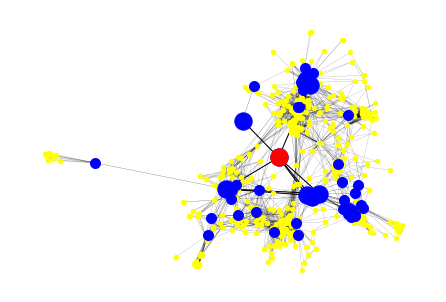

In [86]:
pos = nx.spring_layout(neighbourhood_3)
nx.draw(neighbourhood_3, pos=pos, node_color='yellow', node_size=20, font_color='white', width=0.1)
nx.draw(neighbourhood_2, pos=pos, node_color='blue', node_size=100, font_color='white', width=0.1)
nx.draw(neighbourhood_1, pos=pos, node_color='blue', font_color='white')
nx.draw(graph.subgraph([ICP55]), pos=pos, node_color='red', font_color='white', width=2)

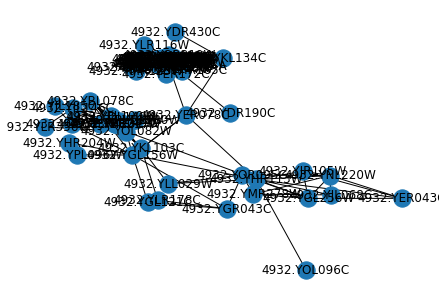

In [83]:
nx.draw(neighbourhood_2, pos=pos, with_labels=True)

In [22]:
INFLATION = 2
matrix = nx.to_scipy_sparse_matrix(graph)
result = mc.run_mcl(matrix, inflation=INFLATION)
clusters = mc.get_clusters(result)
cluster_sizes=sorted([len(cluster) for cluster in clusters])
max_cluster_size = max(cluster_sizes)

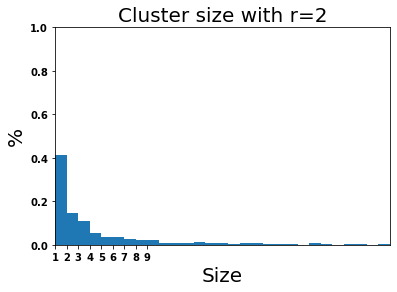

In [23]:
lib.plot.hist(cluster_sizes,
              title=f'Cluster size with r={INFLATION}',
              xlabel='Size',
              ylabel='%',
              xlim=(1, 30),
              yticks=[0, 0.2, 0.4, 0.6, 0.8, 1],
              xticks=list(range(1, 10, 1)),
              bins=list(range(1, max_cluster_size, 1)),
              density=True,
              )